In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')

In [5]:
raw_data = pd.read_csv('admitance.csv')

In [6]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [7]:
data = raw_data.copy()

In [8]:
data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [9]:
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [10]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [11]:
y = data['Admitted']

In [12]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [13]:
x1 = data['SAT']

In [14]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

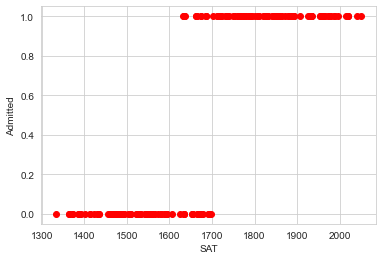

In [22]:
plt.scatter(x1,y,color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [23]:
x = sm.add_constant(x1)

In [24]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [25]:
reg_lin = sm.OLS(y,x)

In [26]:
result_lin = reg_lin.fit()

In [27]:
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.98e-43
Time:                        22:16:44   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# yhat = b1*x1+b0

In [30]:
result_lin.params  # bo aur b1 ki value deta hai
#bo- constant, b1- slope

const   -3.251859
SAT      0.002248
dtype: float64

In [31]:
result_lin.params[1]

0.0022482399779685663

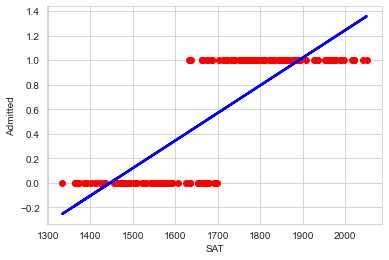

In [32]:
plt.scatter(x1,y,color='red')
yhat = result_lin.params[0]+x1*result_lin.params[1]
# x1*0.002248+(-3.251859)
plt.plot(x1,yhat,lw=2.5,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# Logistic Reg^

In [38]:
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [41]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

In [42]:
result_log.params

const   -69.912802
SAT       0.042005
dtype: float64

In [44]:
f_sort = np.sort(f(x1,result_log.params[0],result_log.params[1]))

In [48]:
f_sort.round(2)  # roundup karana 2 decimal point tak

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04,
       0.04, 0.05, 0.05, 0.08, 0.16, 0.2 , 0.21, 0.22, 0.22, 0.22, 0.22,
       0.23, 0.38, 0.39, 0.41, 0.47, 0.49, 0.5 , 0.5 , 0.52, 0.56, 0.6 ,
       0.6 , 0.61, 0.65, 0.7 , 0.72, 0.72, 0.75, 0.77, 0.8 , 0.83, 0.88,
       0.89, 0.89, 0.91, 0.91, 0.92, 0.92, 0.94, 0.95, 0.95, 0.96, 0.97,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [49]:
x_sorted = np.sort(np.array(x1))

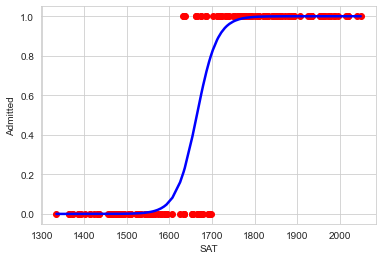

In [50]:
plt.scatter(x1,y,color='red')
plt.plot(x_sorted,f_sort,lw=2.5,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()